!pip install pydot graphviz


In [2]:
!pip install pydotplus


In [3]:
#!/usr/bin/env pyhton3
# -*- coding 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Introduction to tensorFlow fifa dataset
- multi class
- reLU
- swish


In [6]:
# Global variables
inpDir = './input' # Input Stored here
outDir = './ouput' # output Here
modelDir = './models'# to save Models
subDir = 'fifa_2019' # sub dir by dataset
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
#rng = np.random.default_rng(seed = RANDOM_STATE)
#N_SAMPLE = 1000
TEST_SIZE = 3811 # 18147 - 56*256
ALPHA = 0.001 # learning rate
NOISE = 0.2 # Error
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
tf.random.set_seed?


Signature: tf.random.set_seed(seed)
Docstring:
Sets the global random seed.

Operations that rely on a random seed actually derive it from two seeds:
the global and operation-level seeds. This sets the global seed.

Its interactions with operation-level seeds is as follows:

  1. If neither the global seed nor the operation seed is set: A randomly
    picked seed is used for this op.
  2. If the global seed is set, but the operation seed is not:
    The system deterministically picks an operation seed in conjunction with
    the global seed so that it gets a unique random sequence. Within the
    same version of tensorflow and user code, this sequence is deterministic.
    However across different versions, this sequence might change. If the
    code depends on particular seeds to work, specify both global
    and operation-level seeds explicitly.
  3. If the operation seed is set, but the global seed is not set:
    A default global seed and the specified operation seed are used to
  

In [8]:
# inpDir = './input'
# outDir = './output'

In [9]:
#set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Data
FIFA DATASET

## EDA
1. Remove Null From Position
2. Read Unique Values from the columns

In [11]:
data_df = pd.read_csv(os.path.join(inpDir,'fifa_2019.csv'),index_col=1)

In [12]:
data_df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
# X = data_df.drop('Position',axis=1)
# y = data_df['Position']

In [14]:
data_df.dropna(subset= ('Position'), inplace = True)


In [15]:
for col in data_df.columns:
    unq = data_df[col].unique()
    print(f'{col}, #:{len(unq)}, Values:{unq}')

Unnamed: 0, #:18147, Values:[    0     1     2 ... 18204 18205 18206]
Name, #:17140, Values:['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age, #:29, Values:[31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo, #:18147, Values:['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality, #:164, Values:['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Monten

In [16]:
data_df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'

In [17]:
data_df

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,18202,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
243165,18203,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
241638,18204,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K


In [18]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 158023 to 246269
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18147 non-null  int64  
 1   Name                      18147 non-null  object 
 2   Age                       18147 non-null  int64  
 3   Photo                     18147 non-null  object 
 4   Nationality               18147 non-null  object 
 5   Flag                      18147 non-null  object 
 6   Overall                   18147 non-null  int64  
 7   Potential                 18147 non-null  int64  
 8   Club                      17918 non-null  object 
 9   Club Logo                 18147 non-null  object 
 10  Value                     18147 non-null  object 
 11  Wage                      18147 non-null  object 
 12  Special                   18147 non-null  int64  
 13  Preferred Foot            18147 non-null  object 
 14  Inter

In [19]:
data_df.isnull().sum()

Unnamed: 0           0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1504
Length: 88, dtype: int64

In [20]:
# num_cols = data_df.select_dtypes(exclude='object')

In [21]:
# num_cols.info()

In [22]:
rel_cols = ['Position', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
            'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 
            'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 
            'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [23]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
158023,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
20801,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
190871,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
193080,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
192985,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [24]:
data_df.dropna(inplace=True)

In [25]:
data_df.isnull().sum().sum()

0

In [26]:
data_df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [27]:
goalkeeper = 'GK'
forward = ['ST','LW','RW','LF','RF','RS','LS','CF']
midfielder = ['RCM','LCM','LDM','CAM','CDM','RDM','RAM','CM','LAM','RM','LM']
defender = ['CB','RCB','LCB','LWB','RWB','LB','RB']

In [28]:
data_df.loc[data_df['Position'] == 'GK','Position'] = 0
data_df.loc[data_df['Position'].isin(defender),'Position'] = 1
data_df.loc[data_df['Position'].isin(midfielder),'Position'] = 2

data_df.loc[data_df['Position'].isin(forward),'Position'] = 3

In [29]:
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast = 'integer')

In [30]:
data_df['Position'].unique()


array([3, 0, 2, 1], dtype=int8)

In [31]:
class_labels = {0:'Goalkeeper', 1: 'Defender', 2: 'Midfielder', 3: 'Forward'}

In [32]:
X = data_df.drop('Position',axis=1)
y = data_df['Position'].to_numpy()

## Split Data in test train

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14336, 33), (3811, 33), (14336,), (3811,))

In [35]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train.shape

(14336, 33)

## Converting  to dataset

* In TensorFlow, Dataset.from_tensor_slices is a method used *
* to create a dataset from a tensor or a list of tensors.*
* It is part of TensorFlow's tf.data API,* 
* which provides tools for building scalable input pipelines.*
*This method allows you to create a dataset from your data (usually stored in tensors or numpy arrays)*
*and slice it into individual elements.*
* These elements can then be fed into a model for training or evaluation.*

In [40]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))# converting numpy data to tensor dataset

In [41]:
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))# converting numpy data to tensor dataset

In [42]:
type(train_ds),type(X_train)

(tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset,
 numpy.ndarray)

## Preprocessing And Batching 

In [44]:
train_ds = train_ds.shuffle(buffer_size  = X_train.shape[0]).batch(BATCH_SIZE) # gives two output X_tensor , y_tensor depends on Batch Size
test_ds = test_ds.shuffle(buffer_size  = X_test.shape[0]).batch(BATCH_SIZE)

In [45]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [46]:
next(iter(train_ds))

(<tf.Tensor: shape=(256, 33), dtype=float64, numpy=
 array([[ 0.84327811,  0.67601238,  1.44857044, ..., -0.55936467,
         -0.55145134, -0.42982942],
        [-1.00037375,  1.53865868,  0.29297255, ..., -0.3164643 ,
         -0.55145134, -0.3182802 ],
        [-0.9491612 ,  0.67601238, -0.59071995, ..., -0.55936467,
         -0.6692196 , -0.37405481],
        ...,
        [-0.89794865,  1.13609041,  0.42892525, ..., -0.37718939,
         -0.49256722, -0.20673099],
        [-1.51249927, -2.19947527, -2.90191573, ...,  3.20559096,
          3.33490115,  2.97242174],
        [ 1.09934087,  0.9060514 , -0.11488553, ..., -0.19501412,
         -0.61033547, -0.54137864]])>,
 <tf.Tensor: shape=(256,), dtype=int8, numpy=
 array([2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0,
        1, 2, 1, 1, 3, 1, 0, 2, 2, 2, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 2, 3,
        3, 2, 1, 2, 2, 3, 1, 1, 0, 2, 0, 2, 3, 0, 2, 3, 2, 3, 2, 1, 3, 1,
        3, 0, 1, 1, 0, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2,

*To create a variable with X_train.shape[1] value*

In [48]:
# input_shape = (X_train.shape[1])
# input_shape


* deleting the dataset and freeing the space 

In [50]:
# import gc
# del data_df, X_train, X_test, y_train, y_test
# gc.collect()


In [51]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],), name = 'input'), # input layer
    tf.keras.layers.Dense(18, activation = 'leaky_relu', name = 'fc_1'), # Hidden layer called dense in tensorflow # tf.nn.silu
    #tf.keras.layers.Dense(4, activation = 'relu',  name = 'fc_2'),# node called as unit
    # tf.keras.layers.Dense(4, activation = 'relu', name = 'fc_3'),# fully connected layer(Fc)
    # tf.keras.layers.Dense(3, activation = 'relu',  name = 'fc_4'),
    tf.keras.layers.Dense(4, name = 'output')
    
])

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                         │ (None, 18)                  │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688 (2.69 KB)

 Trainable params: 688 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal

In [54]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

-2.3054667

In [55]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)
model.compile(optimizer = optimizer, # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )

# Comments are alternate ways to do 

In [58]:
history = model.fit(train_ds,#x = X_train, y = y_train, 
                    validation_data = test_ds,#[X_test, y_test],
                    #batch_size = BATCH_SIZE,
                    verbose = 2,
                    epochs =EPOCHS
                   )

Epoch 1/100
56/56 - 1s - 23ms/step - accuracy: 0.4080 - loss: 1.1820 - val_accuracy: 0.6626 - val_loss: 0.8599
Epoch 2/100
56/56 - 0s - 2ms/step - accuracy: 0.7545 - loss: 0.6925 - val_accuracy: 0.7882 - val_loss: 0.5672
Epoch 3/100
56/56 - 0s - 2ms/step - accuracy: 0.8066 - loss: 0.5082 - val_accuracy: 0.8092 - val_loss: 0.4653
Epoch 4/100
56/56 - 0s - 2ms/step - accuracy: 0.8221 - loss: 0.4384 - val_accuracy: 0.8224 - val_loss: 0.4200
Epoch 5/100
56/56 - 0s - 2ms/step - accuracy: 0.8345 - loss: 0.4017 - val_accuracy: 0.8292 - val_loss: 0.3921
Epoch 6/100
56/56 - 0s - 2ms/step - accuracy: 0.8435 - loss: 0.3777 - val_accuracy: 0.8365 - val_loss: 0.3725
Epoch 7/100
56/56 - 0s - 2ms/step - accuracy: 0.8521 - loss: 0.3600 - val_accuracy: 0.8449 - val_loss: 0.3575
Epoch 8/100
56/56 - 0s - 2ms/step - accuracy: 0.8584 - loss: 0.3467 - val_accuracy: 0.8494 - val_loss: 0.3461
Epoch 9/100
56/56 - 0s - 2ms/step - accuracy: 0.8628 - loss: 0.3365 - val_accuracy: 0.8549 - val_loss: 0.3377
Epoch 10/

,accuracy,loss,val_accuracy,val_loss
0,0.407994,1.182021,0.662556,0.859886
1,0.754534,0.692527,0.788245,0.567168
2,0.806571,0.508217,0.809236,0.465321
3,0.822126,0.438418,0.822356,0.419965
4,0.834542,0.401746,0.829179,0.392133


<Axes: >

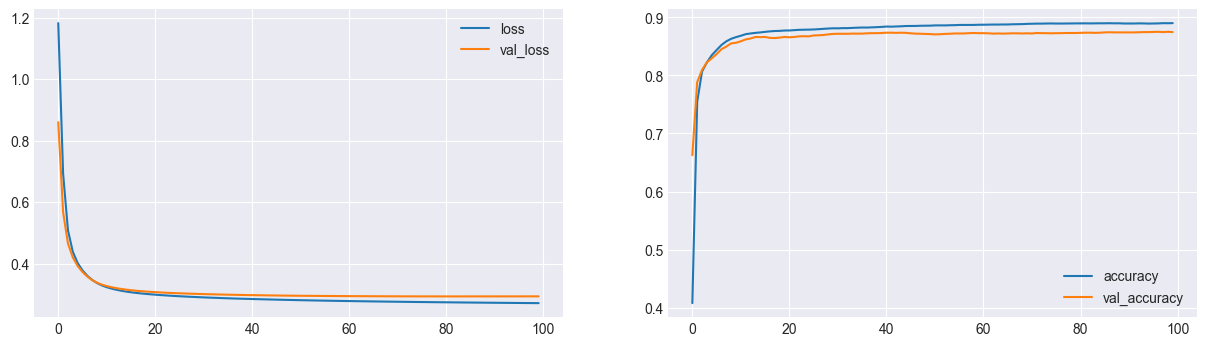

In [59]:
hist_df = pd.DataFrame(history.history) #Dictionary
display(hist_df.head())
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [60]:
pd.DataFrame(history.history)


,accuracy,loss,val_accuracy,val_loss
0,0.407994,1.182021,0.662556,0.859886
1,0.754534,0.692527,0.788245,0.567168
2,0.806571,0.508217,0.809236,0.465321
3,0.822126,0.438418,0.822356,0.419965
4,0.834542,0.401746,0.829179,0.392133
...,...,...,...,...
95,0.889090,0.271791,0.874574,0.293301
96,0.889230,0.271671,0.874836,0.293310
97,0.889648,0.271535,0.874311,0.293328
98,0.889579,0.271417,0.874836,0.293357


## LEAKY ReLU

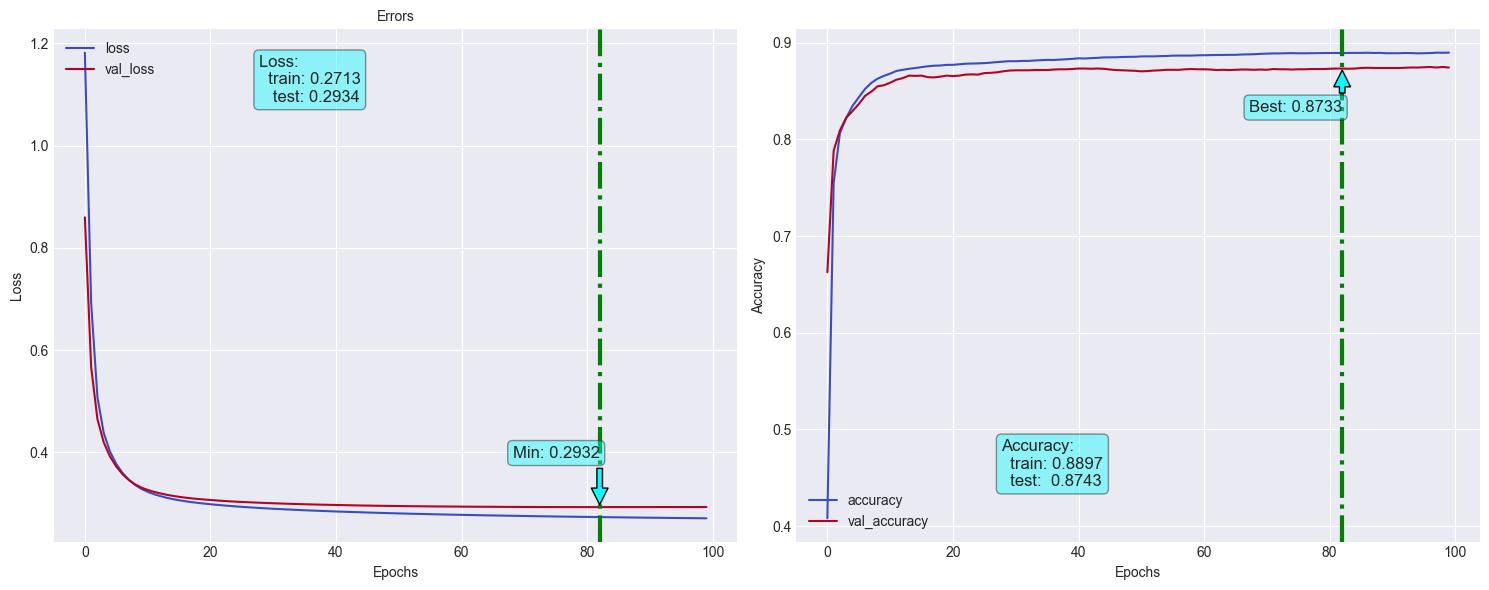

In [62]:
fn_plot_tf_hist(hist_df = hist_df)

In [63]:
#PREDICTION MODEL can take Softmax so we won't get any problem becoz during training model behave differently
# but during validation it behave normally
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 4)                   │             688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688 (2.69 KB)

 Trainable params: 688 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# data is coming in batches from train_ds
y_true, y_pred = [],[]
for feat, lbls in train_ds: #for count, data in enumerate(train_ds):
    #feat, lbls = data
    #print(count,feat.shape, lbls.shape) 
    pred = prediction_model(feat).numpy() # getting 4 prediction 
    pred  = pred.argmax(axis=1) # here we get prediction of 1 class/ feature which has highest probability
    #print(type(pred))
    y_true.extend(lbls) # Append 
    y_pred.extend(pred)
len(y_true), len(y_pred)

(14336, 14336)

In [65]:
print(classification_report(y_true,y_pred)) #Support : is the number of actual occurrences of each class in the dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.92      0.93      0.93      4634
           2       0.84      0.88      0.86      5402
           3       0.87      0.79      0.83      2700

    accuracy                           0.89     14336
   macro avg       0.91      0.90      0.90     14336
weighted avg       0.89      0.89      0.89     14336



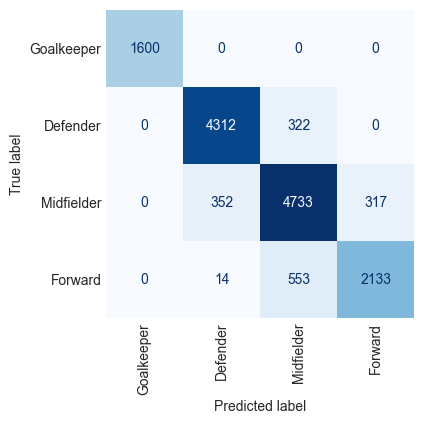

In [66]:
fn_plot_confusion_matrix(y_true,y_pred,labels=class_labels)

## For test dataset

In [68]:
y_true, y_pred = [],[]
for feat, lbls in test_ds: #for count, data in enumerate(train_ds):
    #feat, lbls = data
    #print(count,feat.shape, lbls.shape) 
    pred = prediction_model(feat).numpy()
    pred  = pred.argmax(axis=1) # max features index
    #print(type(pred))
    y_true.extend(lbls)
    y_pred.extend(pred)
len(y_true), len(y_pred)

(3811, 3811)

In [69]:
print(classification_report(y_true,y_pred)) #Support : is the number of actual occurrences of each class in the dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       0.92      0.93      0.92      1232
           2       0.82      0.86      0.84      1436
           3       0.84      0.73      0.78       718

    accuracy                           0.87      3811
   macro avg       0.89      0.88      0.89      3811
weighted avg       0.87      0.87      0.87      3811



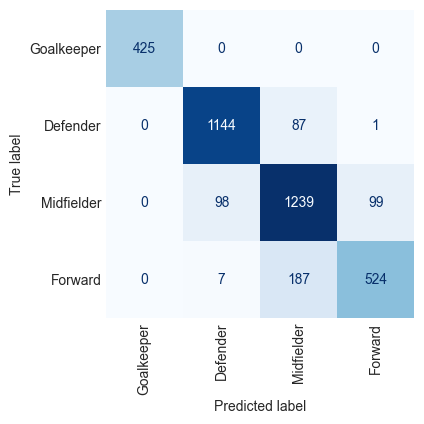

In [70]:
fn_plot_confusion_matrix(y_true,y_pred,labels=class_labels)

In [71]:
y_pred = model.predict(X_train)
accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


0.8913225446428571

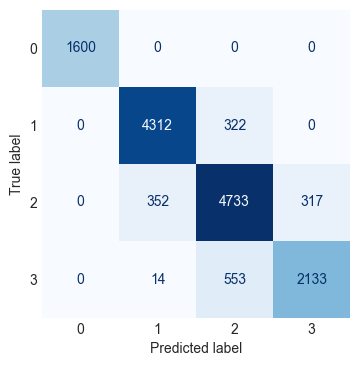

In [72]:
cm = confusion_matrix(y_true=y_train, y_pred= y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [73]:
y_pred = model.predict(X_test)
accuracy_score(y_true= y_test, y_pred = y_pred.argmax(axis=1))

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


0.8743112044082918

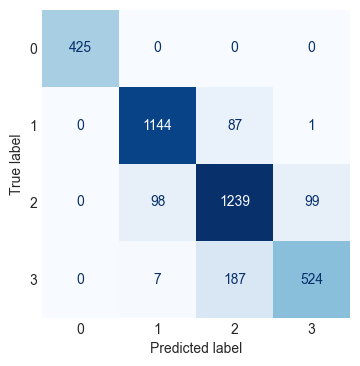

In [74]:
cm = confusion_matrix(y_true=y_test, y_pred= y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

## DONOT Look Down

In [76]:
# train.csv -> Train, valid dataset
# accuracy -> predcition on test data


In [77]:
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(2,), name = 'input'), # input layer
#     tf.keras.layers.Dense(5, activation = 'relu', name = 'fc_1'), # Hidden layer called dense in tensorflow
#     tf.keras.layers.Dense(5, activation = 'relu',  name = 'fc_2'),# node called as unit
#     tf.keras.layers.Dense(4, activation = 'relu', name = 'fc_3'),# fully connected layer(Fc)
#     tf.keras.layers.Dense(3, activation = 'relu',  name = 'fc_4'),
#     tf.keras.layers.Dense(2, name = 'output')
    
# ])

In [78]:
 # tf.keras.layers.Dense?


In [79]:
## Unit testing

In [80]:
# prediction = model(X_train[:1]).numpy()
# prediction.sum()

In [81]:
# tf.nn.softmax(prediction).numpy().sum()

In [82]:
# model.summary()

In [83]:
# tf.keras.utils.plot_model(model, "My_first_model.png",
#                          show_shapes = True,show_dtype=True,
#                          show_layer_names = True)

In [84]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal

In [85]:
# loss_fn(y_train[:1], prediction).numpy()

In [86]:
# model.compile(optimizer = 'adam', # optimisation, loss calculation 
#              loss = loss_fn,
#               metrics = ['accuracy']
#              )

In [87]:
# history = model.fit(x = X_train, y = y_train, 
#                     validation_data = [X_test, y_test],
#                     epochs =EPOCHS
#                    )

In [88]:
# hist_df = pd.DataFrame(history.history) #Dictionary
# display(hist_df.head())
# fig, axes = plt.subplots(1,2)
# hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
# hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [89]:
# pd.DataFrame(history.history)


In [90]:
# fn_plot_tf_hist(hist_df = hist_df)

In [91]:
# y_pred = model.predict(X_train)
# accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

In [92]:
# cm = confusion_matrix(y_true=y_train, y_pred= y_pred.argmax(axis=1))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [93]:
# y_pred = predict(model, X_test)
# accuracy_score(y_true = y_test, y_pred = y_pred)


In [94]:
#1.1**1000

In [95]:
################### Don't look Down

In [96]:
# rng = np.random.default_rng(seed=RANDOM_STATE)
# def train_weights(train, alpha, n_epoch):
#     errors = []
#     weights = rng.random(data_train.shape[1]) # randomly generated weights
#     m= train.shape[0] # number of samples
#     for epoch in range(n_epoch):
#         sum_error = 0.0
#         for row in train:
#             prediction = predict(row, weights)
#             dz = prediction - row[-1] # a-y
#             sum_error +=  - row[-1] * np.log(prediction) # sum of squared error
#             weights[0] +=  - alpha * dz / m # calculating and adjusting weights by alpha multiplication and  divide with whole row no. to get error for whole set
#             for i in range(len(row) - 1):
#                 weights[i+1] += -alpha * row[i] * dz / m
#         errors.append(sum_error / m)
#     return errors, weights

In [97]:
# def predict(model, X_p):
#     W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
#     b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
#     # Layer1 
#     z1 = X_p.dot(W1) + b1 # Aggregation function
#     a1 = fn_actv(z1) ## Activation function
#     # Layer 2
#     z2 = a1.dot(W2) + b2 # Aggregation function
#     a2 = fn_actv(z2) ## Activation function
#     #Layer 3
#     z3 = a2.dot(W3) + b3 # Aggregation function
#     a3 = fn_actv(z3) ## Activation function
#      #Layer 4
#     z4 = a3.dot(W4) + b4 # Aggregation function
#     a4 = fn_actv(z4) ## Activation function
    
#      #Layer 5
#     z5 = a4.dot(W5) + b5 # Aggregation function
#     a5 = softmax(z5) ## Activation function

#     return a5.argmax(axis=1)


In [98]:
# def fn_calculate_loss(model, X_l, y_l):
#     W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
#     b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']

#     m = X_l.shape[0]
    
#     # Layer1 
#     z1 = X_l.dot(W1) + b1 # Aggregation function
#     a1 = fn_actv(z1) ## Activation function
#     # Layer 2
#     z2 = a1.dot(W2) + b2 # Aggregation function
#     a2 = fn_actv(z2) ## Activation function
#     #Layer 3
#     z3 = a2.dot(W3) + b3 # Aggregation function
#     a3 = fn_actv(z3) ## Activation function
#      #Layer 4
#     z4 = a3.dot(W4) + b4 # Aggregation function
#     a4 = fn_actv(z4) ## Activation function
    
#      #Layer 5
#     z5 = a4.dot(W5) + b5 # Aggregation function
#     a5 = softmax(z5) ## Activation function
#     data_loss = -(y_l * np.log(a5) + (1 - y_l)*np.log(1-a5)).sum()
#     return data_loss / m

In [99]:
# def fn_actv(z):
#     return np.tanh(z)

# def fn_actv_prime(z): # Differentiation of Tanh()
#     return 1 - (np.tanh(z))**2

In [100]:
# fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

In [101]:
# def predict():
#     z = 1
#     return sigmoid(z) # stepwise Activation Function
        

In [102]:
# def fn_loss_calculate_loss():
#     pass

## Split DATA in Test Train

In [104]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [105]:
# def build_model(param, X_t, y_t, n_epochs= EPOCHS, alpha = ALPHA):
#     '''
#     5-5-4-3
#     '''
#     # get dimensions for weights init
#     m = X_t.shape[0]
    
#     # initialize weights
#     W1 = rng.random((param[0], param[1]), dtype = np.float32) / np.sqrt(param[0])
#     W2 = rng.random((param[1], param[2]), dtype = np.float32)/np.sqrt(param[1])
#     W3 = rng.random((param[2], param[3]), dtype = np.float32)/np.sqrt(param[2]) 
#     W4 = rng.random((param[3], param[4]), dtype = np.float32)/np.sqrt(param[3])
#     W5 = rng.random((param[4], param[5]), dtype = np.float32)/np.sqrt(param[4])
    
#     # initialize bias
#     b1 = np.zeros((1,param[1]), dtype = np.float32)
#     b2 = np.zeros((1,param[2]), dtype = np.float32)
#     b3 = np.zeros((1,param[3]), dtype = np.float32)
#     b4 = np.zeros((1,param[4]), dtype = np.float32)
#     b5 = np.zeros((1,param[5]), dtype = np.float32)

#     # print(W1.shape, W2.shape, W3.shape, W4.shape, W5.shape)
#     # print(b1.shape, b2.shape, b3.shape, b4.shape, b5.shape)
    
#     curr_loss = 0
#     loss = []
#     # loss_hist = {}
#     epoch = []
#     for i in range(n_epochs):
#         ### Forwards propagation
#         # Layer1 
#         z1 = X_t.dot(W1) + b1 # Aggregation function
#         a1 = fn_actv(z1) ## Activation function
#         # Layer 2
#         z2 = a1.dot(W2) + b2 # Aggregation function
#         a2 = fn_actv(z2) ## Activation function
#     #Layer 3
#         z3 = a2.dot(W3) + b3 # Aggregation function
#         a3 = fn_actv(z3) ## Activation function
#          #Layer 4
#         z4 = a3.dot(W4) + b4 # Aggregation function
#         a4 = fn_actv(z4) ## Activation function

#          #Layer 5
#         z5 = a4.dot(W5) + b5 # Aggregation function
#         a5 = softmax(z5) ## Activation function

#     # # Layer2
#     #     z2 = a1.dot(W2) + b2 # Aggregation function
#     #     a2 = sigmoid(z2)# Activation function

#         ### Back Propagation
#         ## Layer 5
#         dz5 = a5 - y_t # y should be of shape (1,m)
        
#         dW5 = (a4.T).dot(dz5)
#         assert(W5.shape == dW5.shape), f'Shape: W5- {W5.shape} and dW5-{dW5.shape}'
#         db5 = np.sum(dz5, axis = 0, keepdims =True)
#         assert(b5.shape == db5.shape), f'Shape: b5- {b5.shape} and db5-{db5.shape}'
#         da4 = dz5.dot(W5.T)
#         assert(a4.shape == da4.shape), f'Shape: a4-{a4.shape} and da4-{da4.shape}'
#         # layer 4
#         dz4 = da4 * fn_actv_prime(z4)
#         dW4 = (a3.T).dot(dz4)
#         assert(W4.shape == dW4.shape),f'Shape: W4- {W4.shape} and dW4-{dW4.shape}'
#         db4 = np.sum(dz4, axis = 0, keepdims =True)
#         assert(b4.shape == db4.shape), f'Shape: b4- {b4.shape} and db4-{db4.shape}'
#         da3 = dz4.dot(W4.T)
#         assert(a3.shape == da3.shape), f'Shape: a3-{a3.shape} and da3-{da3.shape}'

#         # layer3
#         dz3 = da3 * fn_actv_prime(z3)
#         dW3 = (a2.T).dot(dz3)
#         assert(W3.shape == dW3.shape),f'Shape: W3- {W3.shape} and dW3-{dW3.shape}'
#         db3 = np.sum(dz3, axis = 0, keepdims =True)
#         assert(b3.shape == db3.shape), f'Shape: b3- {b3.shape} and db3-{db3.shape}'
#         da2 = dz3.dot(W3.T)
#         assert(a2.shape == da2.shape), f'Shape: a2-{a2.shape} and da2-{da2.shape}'

#         #Layer2
#         dz2 = da2 * fn_actv_prime(z2)
#         dW2 = (a1.T).dot(dz2)
#         assert(W2.shape == dW2.shape), f'Shape: W2- {W2.shape} and dW2-{dW2.shape}'
#         db2 = np.sum(dz2, axis = 0, keepdims =True)
#         assert(b2.shape == db2.shape), f'Shape: b2- {b2.shape} and db2-{db2.shape}'
#         da1 = dz2.dot(W2.T)    
#         assert(a1.shape == da1.shape), f'Shape: a1-{a1.shape} and da1-{da1.shape}'

#         #layer1
#         dz1 = da1 *fn_actv_prime(z1)
#         assert(z1.shape == dz1.shape),f'Shape: z1-{z1.shape} and dz1-{dz1.shape}'
#         dW1 = (X_t.T).dot(dz1)
#         assert(W1.shape == dW1.shape), f'Shape: W1-{W1.shape} and dW1-{dW1.shape}'
#         db1 = np.sum(dz1, axis = 0, keepdims = True)
#         assert(b1.shape == db1.shape), f'Shape: b1-{b1.shape} and db1-{db1.shape}' # assert kind of exception handling
#                 # if shape don't match it fire error, if true do nothing


        
        


        
        
        
        

#         ## Gradient Update
#         W1 += -alpha *dW1 /m
#         W2 += -alpha *dW2 /m
#         W3 += -alpha *dW3 /m
#         W4 += -alpha *dW4 /m
#         W5 += -alpha *dW5 /m
#         b1 += -alpha *db1 /m
#         b2 += -alpha *db2 /m
#         b3 += -alpha *db3 /m
#         b4 += -alpha *db4 /m
#         b5 += -alpha *db5 /m

#         model = {'W1': W1,'W2':W2,'W3':W3, 'W4':W4, 'W5': W5,
#                 'b1': b1, 'b2':b2, 'b3':b3, 'b4':b4, 'b5':b5                
#                 }
        
#         if i%100==0:
#             curr_loss = fn_calculate_loss(model, X_t, y_t)
#             loss.append(curr_loss)
#             epoch.append(i)
            
#         if i%1000 == 0:
#            print(f'Loss after {i:>5d} epochs : {curr_loss:0.5f}')

#     # printing the error reduction curve
#     loss_hist['epoch'] = epoch
#     loss_hist['loss'] = loss
#     fig, ax = plt.subplots()
#     ax.plot(loss)
    
    
#     return model
    

In [106]:
# loss_hist = {}
# layer_params = [X_train.shape[1], 50,50,40,30,y_train.shape[1]]#[2,5,5,4,3,2]
# #y_train = y_train.reshape(-1,1)
# #y_train.shape

In [107]:
# y_train = y_train.reshape(-1,1)
# y_train.shape

In [108]:
# loss_hist = {}


In [109]:
# model = build_model(layer_params,X_train,y_train )

In [110]:
# pd.DataFrame(loss_hist).plot(x='epoch', y='loss');

In [111]:
# y_pred = predict(model, X_train)
# accuracy_score(y_true = y_train.argmax(axis=1), y_pred = y_pred)


In [112]:
# cm = confusion_matrix(y_true=y_train.argmax(axis=1), y_pred= y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [113]:
# y_pred = predict(model, X_test)
# accuracy_score(y_true = y_test.argmax(axis=1), y_pred = y_pred)


In [114]:
# cm = confusion_matrix(y_true=y_test.argmax(axis=1), y_pred= y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
# fig,ax = plt.subplots(figsize=(4,4))
# disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
# ax.grid(False)

In [115]:
# def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
#     fig, ax = plt.subplots(figsize =(8,5))
#     dm = 0.05
#     # Min and Max Along Two Axis 
#     x_min, x_max = X_tr[:,0].min(), X_tr[:,0].max()
#     y_min, y_max = X_tr[:,1].min(), X_tr[:,1].max()

#     display(x_min, x_max)
#     display(y_min, y_max)

#     ## generate a mesh grid
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
#                     np.arange(y_min, y_max, dm))
#     display(xx.shape,yy.shape)
#     # ravel means 2d -> 1d
    
#     XX = np.c_[xx.ravel(), yy.ravel()]
#     display(XX.shape)
    
#     y_pred = predict(model,XX)
#     display(y_pred.shape)
#     Z = np.array(y_pred).reshape(xx.shape)
#     ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
#     ax.scatter(X_tr[:,0], X_tr[:,1], c = y_tr.argmax(axis=1), edgecolors = 'k', cmap=CMAP)
#     ax.scatter(X_ts[:,0], X_ts[:,1], c = y_ts.argmax(axis=1), edgecolors = 'k', cmap=CMAP, marker ='*')


In [116]:
# fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test)